In [1]:
#|default_exp app

In [2]:
!pip install -Uqq fastai gradio nbdev

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 23.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 92.0/92.0 kB 8.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 314.6/314.6 kB 24.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 142.5/142.5 kB 3.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.2/47.2 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.8/60.8 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.0/83.0 kB 9.7 MB/s eta

In [3]:
from fastai.vision.all import *

In [17]:
!pip install gradio==3.16.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.2/14.2 MB 3.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 90.7 MB/s eta 0:00:00
  Attempting uninstall: gradio
    Found existing installation: gradio 4.29.0
    Uninstalling gradio-4.29.0:
      Successfully uninstalled gradio-4.29.0


In [18]:
#!export
from fastai.vision.all import load_learner
import gradio as gr

In [19]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [20]:
%cd /content/drive/My Drive/Sports Activity Recognizer

/content/drive/My Drive/Sports Activity Recognizer


In [21]:
#!export
model = load_learner('models/sports-action-recognizer-version3.pkl')

In [22]:
#!export
labels = (
    'archery',
    'baseball swing',
    'basketball shot',
    'boxing jab',
    'cricket batting',
    'cycling sprint',
    'golf swing',
    'horse riding gallop',
    'ice hockey slapshot',
    'rowing',
    'rugby tackle',
    'skiing parallel',
    'soccer kick',
    'surfing cutback',
    'volleyball spike'
)

def recognize_image(image):
  pred, idx, probs = model.predict(image)
  return dict(zip(labels, map(float, probs)))

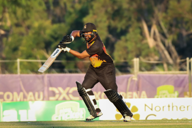

In [23]:
img = PILImage.create(f'test-images/img1.jpg')
img.thumbnail((192,192))
img

In [24]:
recognize_image(img)

{'archery': 0.032961566001176834,
 'baseball swing': 0.06686101853847504,
 'basketball shot': 0.04227059707045555,
 'boxing jab': 0.024598443880677223,
 'cricket batting': 0.29246804118156433,
 'cycling sprint': 0.005497378297150135,
 'golf swing': 0.016042770817875862,
 'horse riding gallop': 0.3417420983314514,
 'ice hockey slapshot': 0.055200014263391495,
 'rowing': 0.0003810992348007858,
 'rugby tackle': 0.024392636492848396,
 'skiing parallel': 0.016370991244912148,
 'soccer kick': 0.07471168786287308,
 'surfing cutback': 0.0013349364744499326,
 'volleyball spike': 0.00516668614000082}

In [27]:
!pip install --upgrade gradio

  Using cached gradio-4.29.0-py3-none-any.whl (12.3 MB)
  Attempting uninstall: gradio
    Found existing installation: gradio 3.16.0
    Uninstalling gradio-3.16.0:
      Successfully uninstalled gradio-3.16.0


In [28]:
#!export
# image = gr.inputs.Image(shape=(192,192))
# label = gr.outputs.Label()
examples = [
    'test-images/img1.jpg',
    'test-images/img2.jpg',
    'test-images/img4.jpg',
    'test-images/img5.jpg'
    ]

# iface = gr.Interface(fn=recognize_image, inputs=image, outputs=label, examples=examples)
# iface.launch(inline=False)
iface = gr.Interface(recognize_image, gr.Image(), gr.Label(), examples=examples)
iface.launch(inline=False,share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://a582f49a1bf6179533.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)
